## Outlier Detection based on Principal Component Analysis

Goal: Identify Outliers using unsupervised algorithm in Shuttle DataSet and validate with labelled dataset

Data Set: http://odds.cs.stonybrook.edu/shuttle-dataset/

Logic: Split the raw data into its principal components and reproject it back the original variable space using only first few principal components. These principal components represent the variance in the normal data points. The reprojection error will be lower for the normal data points while the reprojection error will be larger for outliers. 
By ranking the error the Outliers can be determined.

## Initialization

In [1]:
import numpy as np # for mathematical functions
np.set_printoptions(linewidth=150, suppress= True) # setting print options
np.set_printoptions(precision=3) # setting print precision option

import pandas as pd # To use dataframe structure
pd.set_option('display.float_format', lambda x: '%.3f' % x) # setting display precision option

from sklearn.preprocessing import StandardScaler # for preprocessing data

from sklearn.metrics import accuracy_score, confusion_matrix # for evaluate performance

from scipy.io import loadmat  # a SciPy module that loads mat-files

%matplotlib inline
import matplotlib.pyplot as plt # for visualizing data

import seaborn as sns # for visualizing data

# setting preferred values for seaborn parameters
sns.set(style="ticks")
default_palette = sns.color_palette()
colorsFour = ["light grey", "medium green", "denim blue", "pale red"]
colorsTwo = ["light grey", "pale red"]
#sns.palplot(default_palette)

In [2]:
num_PC = 4 # the number of Principal Components to be included

## Load Data

In [3]:
# Outlier Records verification with supervised data
# Input Data from http://odds.cs.stonybrook.edu/shuttle-dataset/
mat = loadmat('data/shuttle.mat') 
matX = mat['X']
df = pd.DataFrame(matX, index=np.arange(0, len(matX)))
df.columns=['One', 'Two', 'Three', 'Four','Five', 'Six', 'Seven', 'Eight', 'Nine']
df.dropna(how="all", inplace=True) # drops the empty line at file-end
#tempX
Y = mat['y']
startCol = 0
endCol = df.shape[1]

In [4]:
print(df.shape)
df.head()

(49097, 9)


,One,Two,Three,Four,Five,Six,Seven,Eight,Nine
0,50,21,77,0,28,0,27,48,22
1,53,0,82,0,52,-5,29,30,2
2,37,0,76,0,28,18,40,48,8
3,37,0,79,0,34,-26,43,46,2
4,85,0,88,-4,6,1,3,83,80


## Preprocess Data

In [5]:
df.mean()

One     46.932
Two     -0.064
Three   85.123
Four     0.213
Five    36.872
Six      2.160
Seven   38.201
Eight   48.289
Nine    10.262
dtype: float64

In [6]:
# load data table into X dataframe
#df.fillna(0);
Xdf = df.fillna(df.mean()) # fill mean values where there is nan
#Xdf.loc[[1830, 2637, 10482, 14697, 14725]]
# drop NaNs
# Xdf = df.dropna()
# Xdf = Xdf.reset_index(drop=True)
print(Xdf.shape)

(49097, 9)


## Analyze raw data

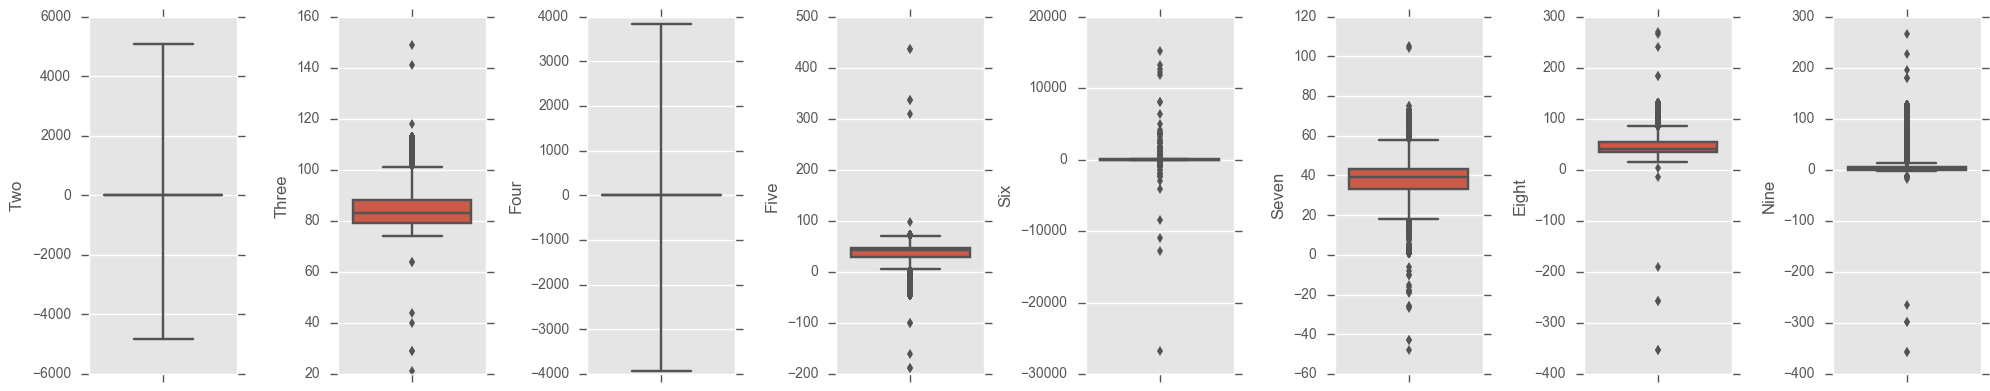

In [7]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(20, 4))
    for i in range(1, Xdf.shape[1]):
        plt.subplot(1, Xdf.shape[1]-1, i)
        sns.boxplot(y=Xdf.columns[i], data=Xdf)
        plt.tight_layout()
    plt.show()
#Xdf.describe()

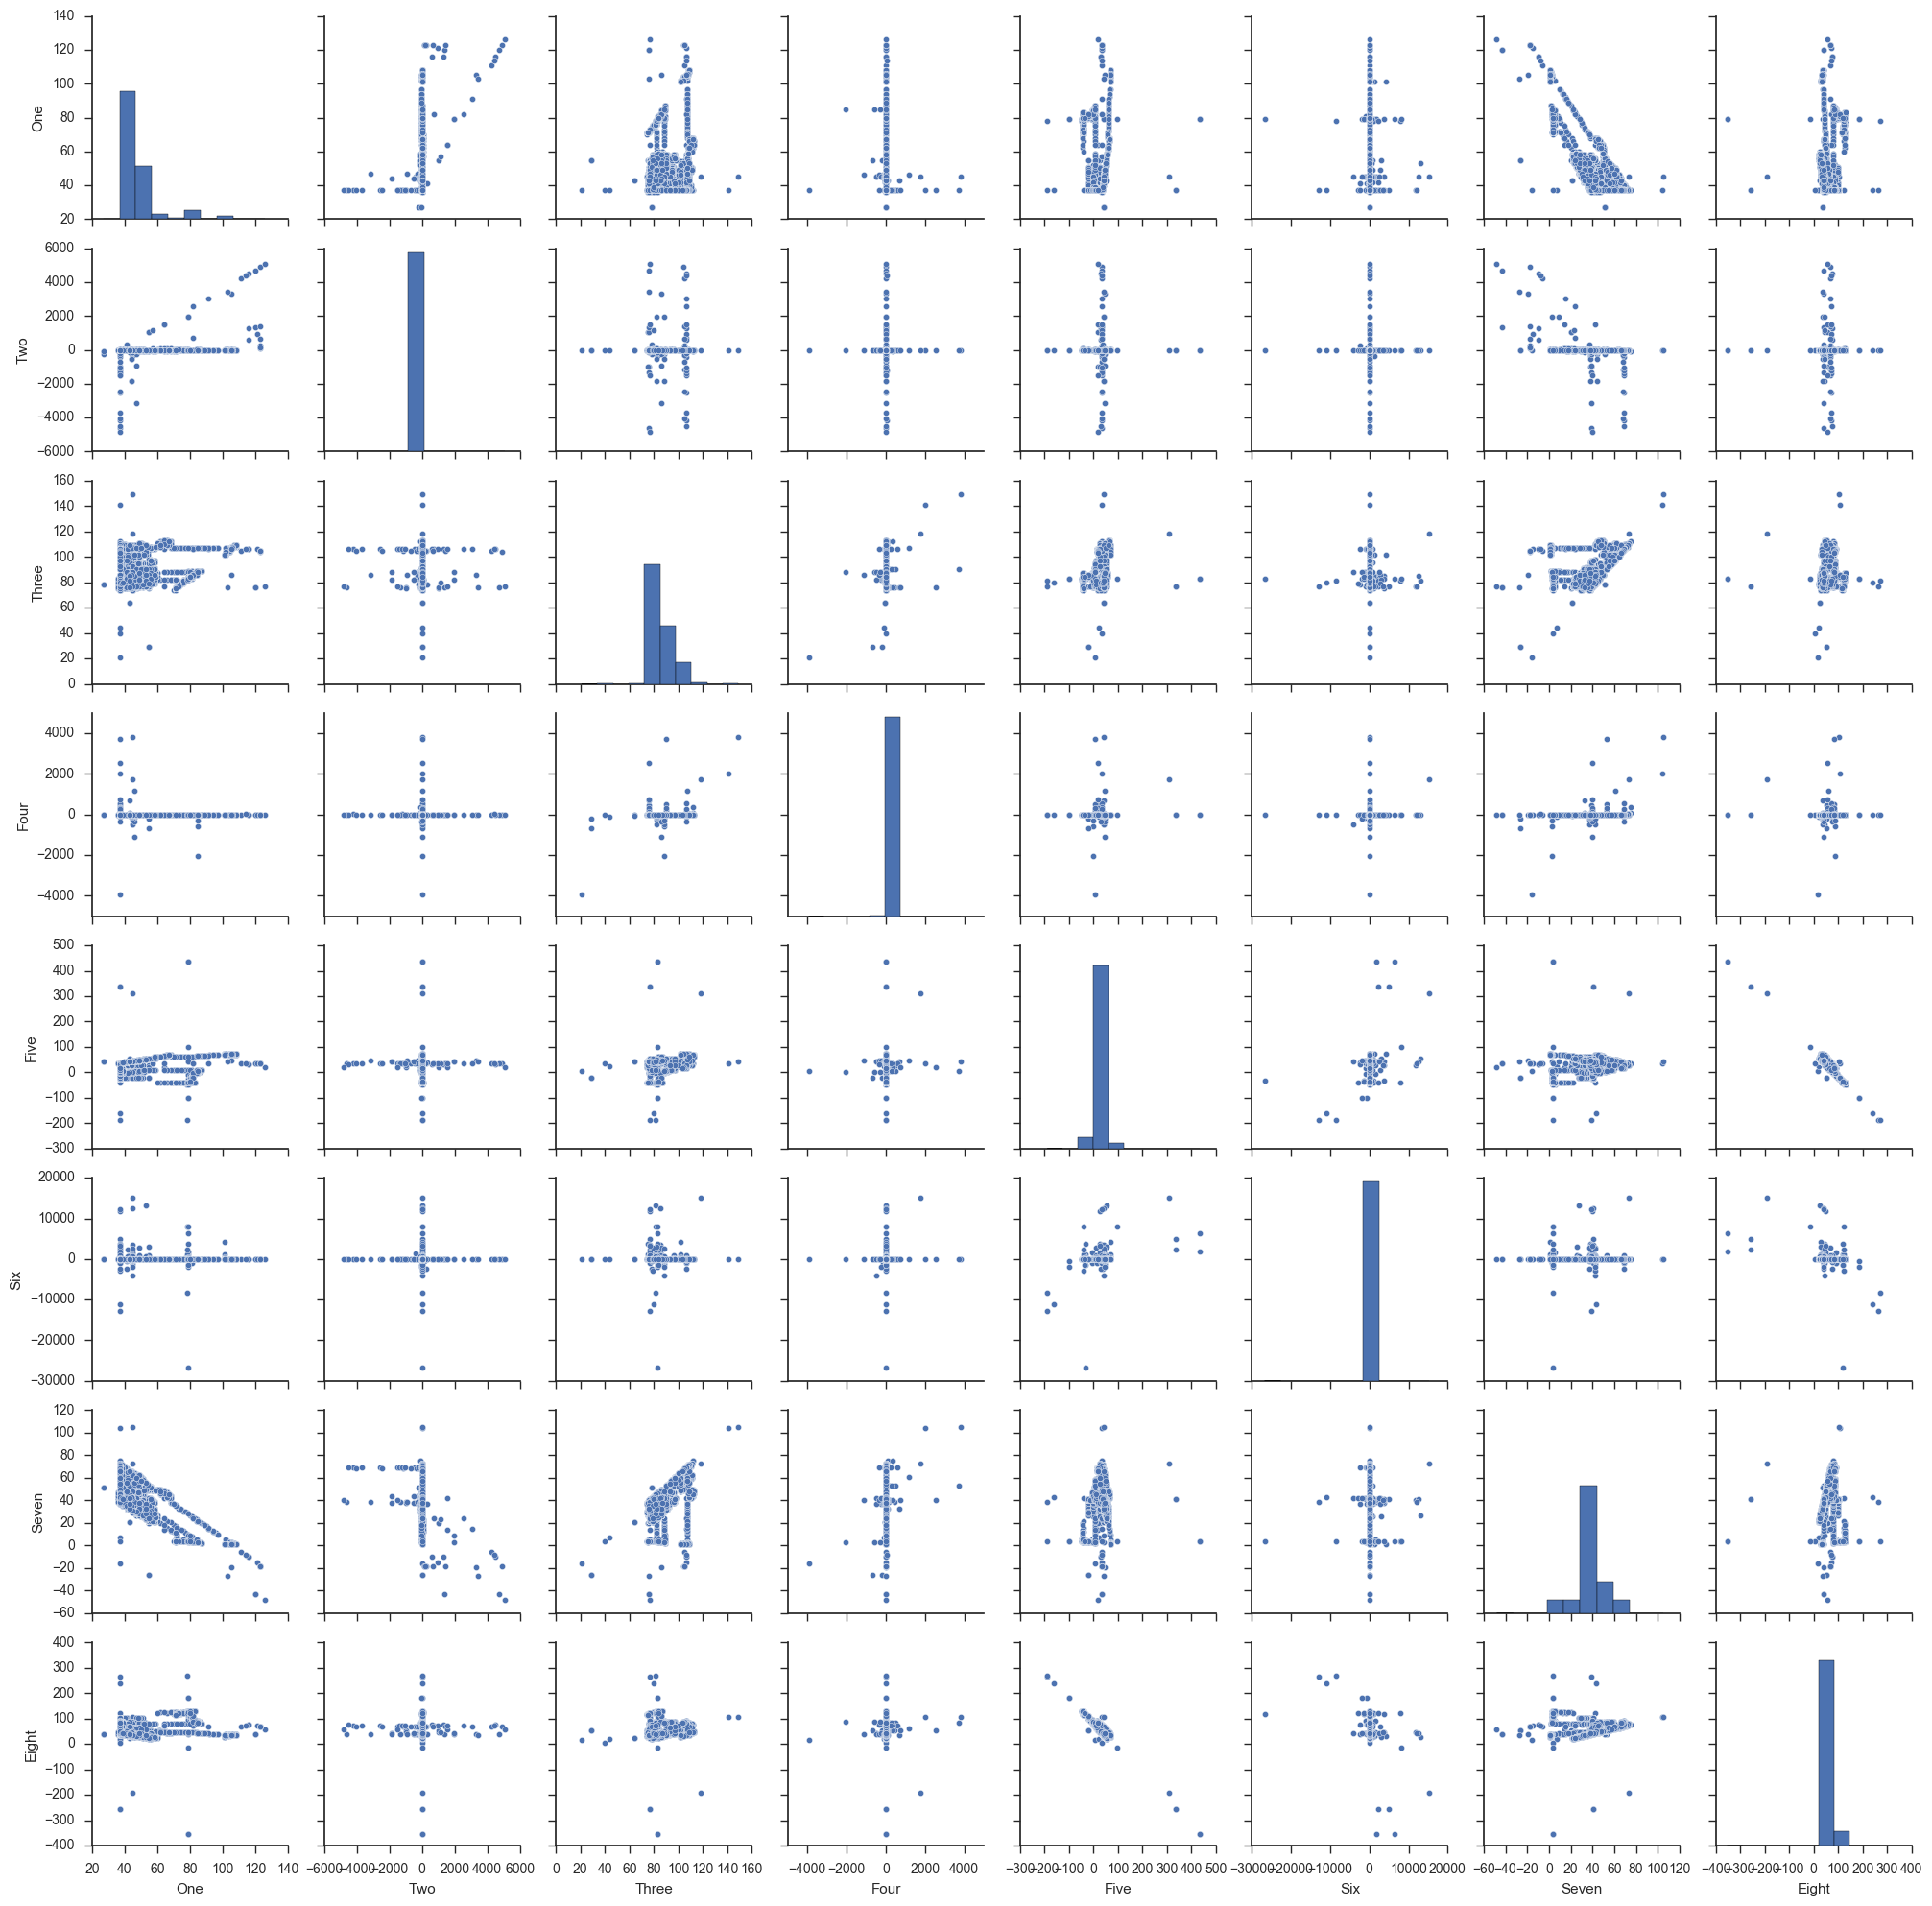

In [8]:
sns.pairplot(Xdf, vars=Xdf.columns[0:8])

## Process Data

In [9]:
X = Xdf.iloc[:,startCol:endCol].values
X_std = StandardScaler().fit_transform(X.astype(float))
X_std.shape

(49097, 9)

Generation covariance matrix:

In [10]:
cov_mat = np.cov(X_std.T)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.     0.072  0.279 -0.009  0.011  0.    -0.775  0.116  0.538]
 [ 0.072  1.    -0.003 -0.    -0.    -0.001 -0.071 -0.001  0.039]
 [ 0.279 -0.003  1.     0.046  0.173  0.002  0.39   0.262  0.006]
 [-0.009 -0.     0.046  1.     0.014  0.073  0.039  0.006 -0.016]
 [ 0.011 -0.     0.173  0.014  1.     0.089  0.101 -0.904 -0.836]
 [ 0.    -0.001  0.002  0.073  0.089  1.     0.001 -0.086 -0.074]
 [-0.775 -0.071  0.39   0.039  0.101  0.001  1.     0.063 -0.51 ]
 [ 0.116 -0.001  0.262  0.006 -0.904 -0.086  0.063  1.     0.826]
 [ 0.538  0.039  0.006 -0.016 -0.836 -0.074 -0.51   0.826  1.   ]]


Eigendecomposition

In [11]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
#for i in eig_pairs:
#    print('%.3f\t' %i[0], i[1])

Sort the (eigenvalue, eigenvector) tuples based on eigenvalues in descending order

In [12]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)
# decending eigenvalues
print('Eigenvalues in descending order with corresponding Eigen vectors:')
for i in eig_pairs:
    print('%.3f\t' %i[0], i[1])

Eigenvalues in descending order with corresponding Eigen vectors:
2.944	 [ 0.303  0.033  0.01  -0.016 -0.493 -0.067 -0.283  0.49   0.582]
1.784	 [ 0.532  0.109 -0.189 -0.04   0.322  0.072 -0.636 -0.392  0.021]
1.308	 [ 0.402  0.046  0.833  0.17   0.26   0.092  0.163  0.106 -0.   ]
1.058	 [ 0.068  0.024  0.153 -0.703  0.085 -0.684  0.035 -0.017 -0.035]
0.988	 [ 0.088 -0.99   0.026 -0.059  0.031  0.041 -0.067 -0.018  0.022]
0.917	 [-0.017  0.065  0.058 -0.687 -0.032  0.716  0.054  0.057  0.018]
0.001	 [-0.145  0.    -0.22  -0.     0.717 -0.     0.178  0.24   0.572]
0.001	 [ 0.645 -0.    -0.44  -0.    -0.005 -0.     0.529  0.212 -0.254]
0.000	 [-0.116  0.    -0.03   0.     0.248 -0.    -0.411  0.699 -0.517]


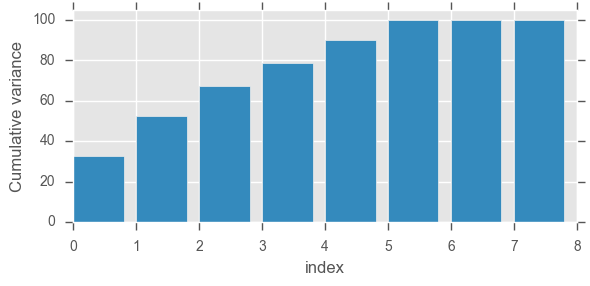

In [13]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# print ("cum_var_exp: " ,cum_var_exp)
with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 3))
    plt.bar([0, 1, 2, 3, 4, 5, 6, 7, 8], cum_var_exp)
    plt.xlabel('index')
    plt.ylabel('Cumulative variance')
    plt.tight_layout()
    plt.axis([0, 8, 0, 105])
    plt.show()

Truncate the number of Pricipal Components (PCs)

In [14]:
print ('Contribution of variance from top %s PCs is %s \n' % (num_PC, cum_var_exp[num_PC-1])) 
Pj_matrix = np.hstack((eig_pairs[0][1].reshape(X_std.shape[1],1),
                      eig_pairs[1][1].reshape(X_std.shape[1],1),
                      eig_pairs[2][1].reshape(X_std.shape[1],1),
                      eig_pairs[3][1].reshape(X_std.shape[1],1)
                      #eig_pairs[4][1].reshape(X_std.shape[1],1),                      
                     ))

print('Truncated Principal Components Matrix (Eigen Vector):\n', Pj_matrix, '\n')
# Pj_matrix.shape

Contribution of variance from top 4 PCs is 78.8108643786 

Truncated Principal Components Matrix (Eigen Vector):
 [[ 0.303  0.532  0.402  0.068]
 [ 0.033  0.109  0.046  0.024]
 [ 0.01  -0.189  0.833  0.153]
 [-0.016 -0.04   0.17  -0.703]
 [-0.493  0.322  0.26   0.085]
 [-0.067  0.072  0.092 -0.684]
 [-0.283 -0.636  0.163  0.035]
 [ 0.49  -0.392  0.106 -0.017]
 [ 0.582  0.021 -0.    -0.035]] 



Projecting the data on to smaller subspace

In [15]:
Yj = X_std.dot(Pj_matrix) # project the data

#print('Shape of Pj_matrix  : ', Pj_matrix.shape)
#print('Shape of input Data : ', X_std.shape)
#print('Shape of the projected Data : ', Yj.shape)

#Yj[:5,:]

Reconstruct (reproject) the data back to the original space

In [16]:
Recons_X_std = Pj_matrix.dot(Yj.transpose()).transpose()

#print('Shape of the reconstructed Data : ', Recons_X_std.shape)

Estimation of Score

In [17]:
score_X_std = np.sum(abs(X_std- Recons_X_std)*cum_var_exp, axis=1)

## Outlier Analysis

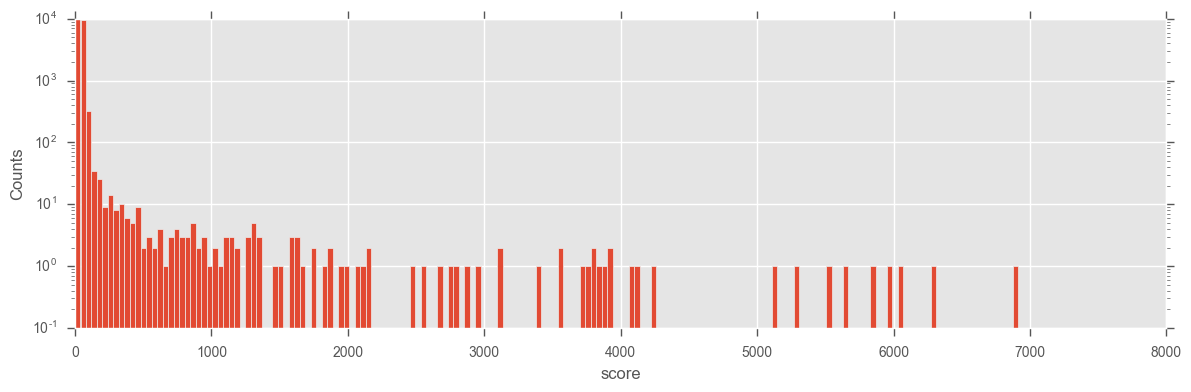

In [18]:
# viewing the scores
with plt.style.context('ggplot'):
    plt.figure(figsize=(12, 4))
    
    #plt.subplot(1, 2, 1)
    #plt.semilogy((score_X_std), marker="o", ls = 'none')
    #plt.xlabel('index')
    #plt.ylabel('Score')
    #plt.tight_layout()
    #plt.axis([0, 20050, 1, 10000])

    #plt.subplot(1, 2, 2)
    bins = np.linspace(0, 8000, 200)
    plt.hist(score_X_std, bins, log = True)
    plt.xlabel('score')
    plt.ylabel('Counts')
    plt.tight_layout()
    plt.axis([0, 8000, .1, 10000])
    plt.show()

In [19]:
score = pd.Series(score_X_std)
# score.describe()

Declare data with scores at the top .15% data as Outliers

In [20]:
Xdf['Score']=pd.Series(score_X_std>np.percentile(score_X_std, 99.85))

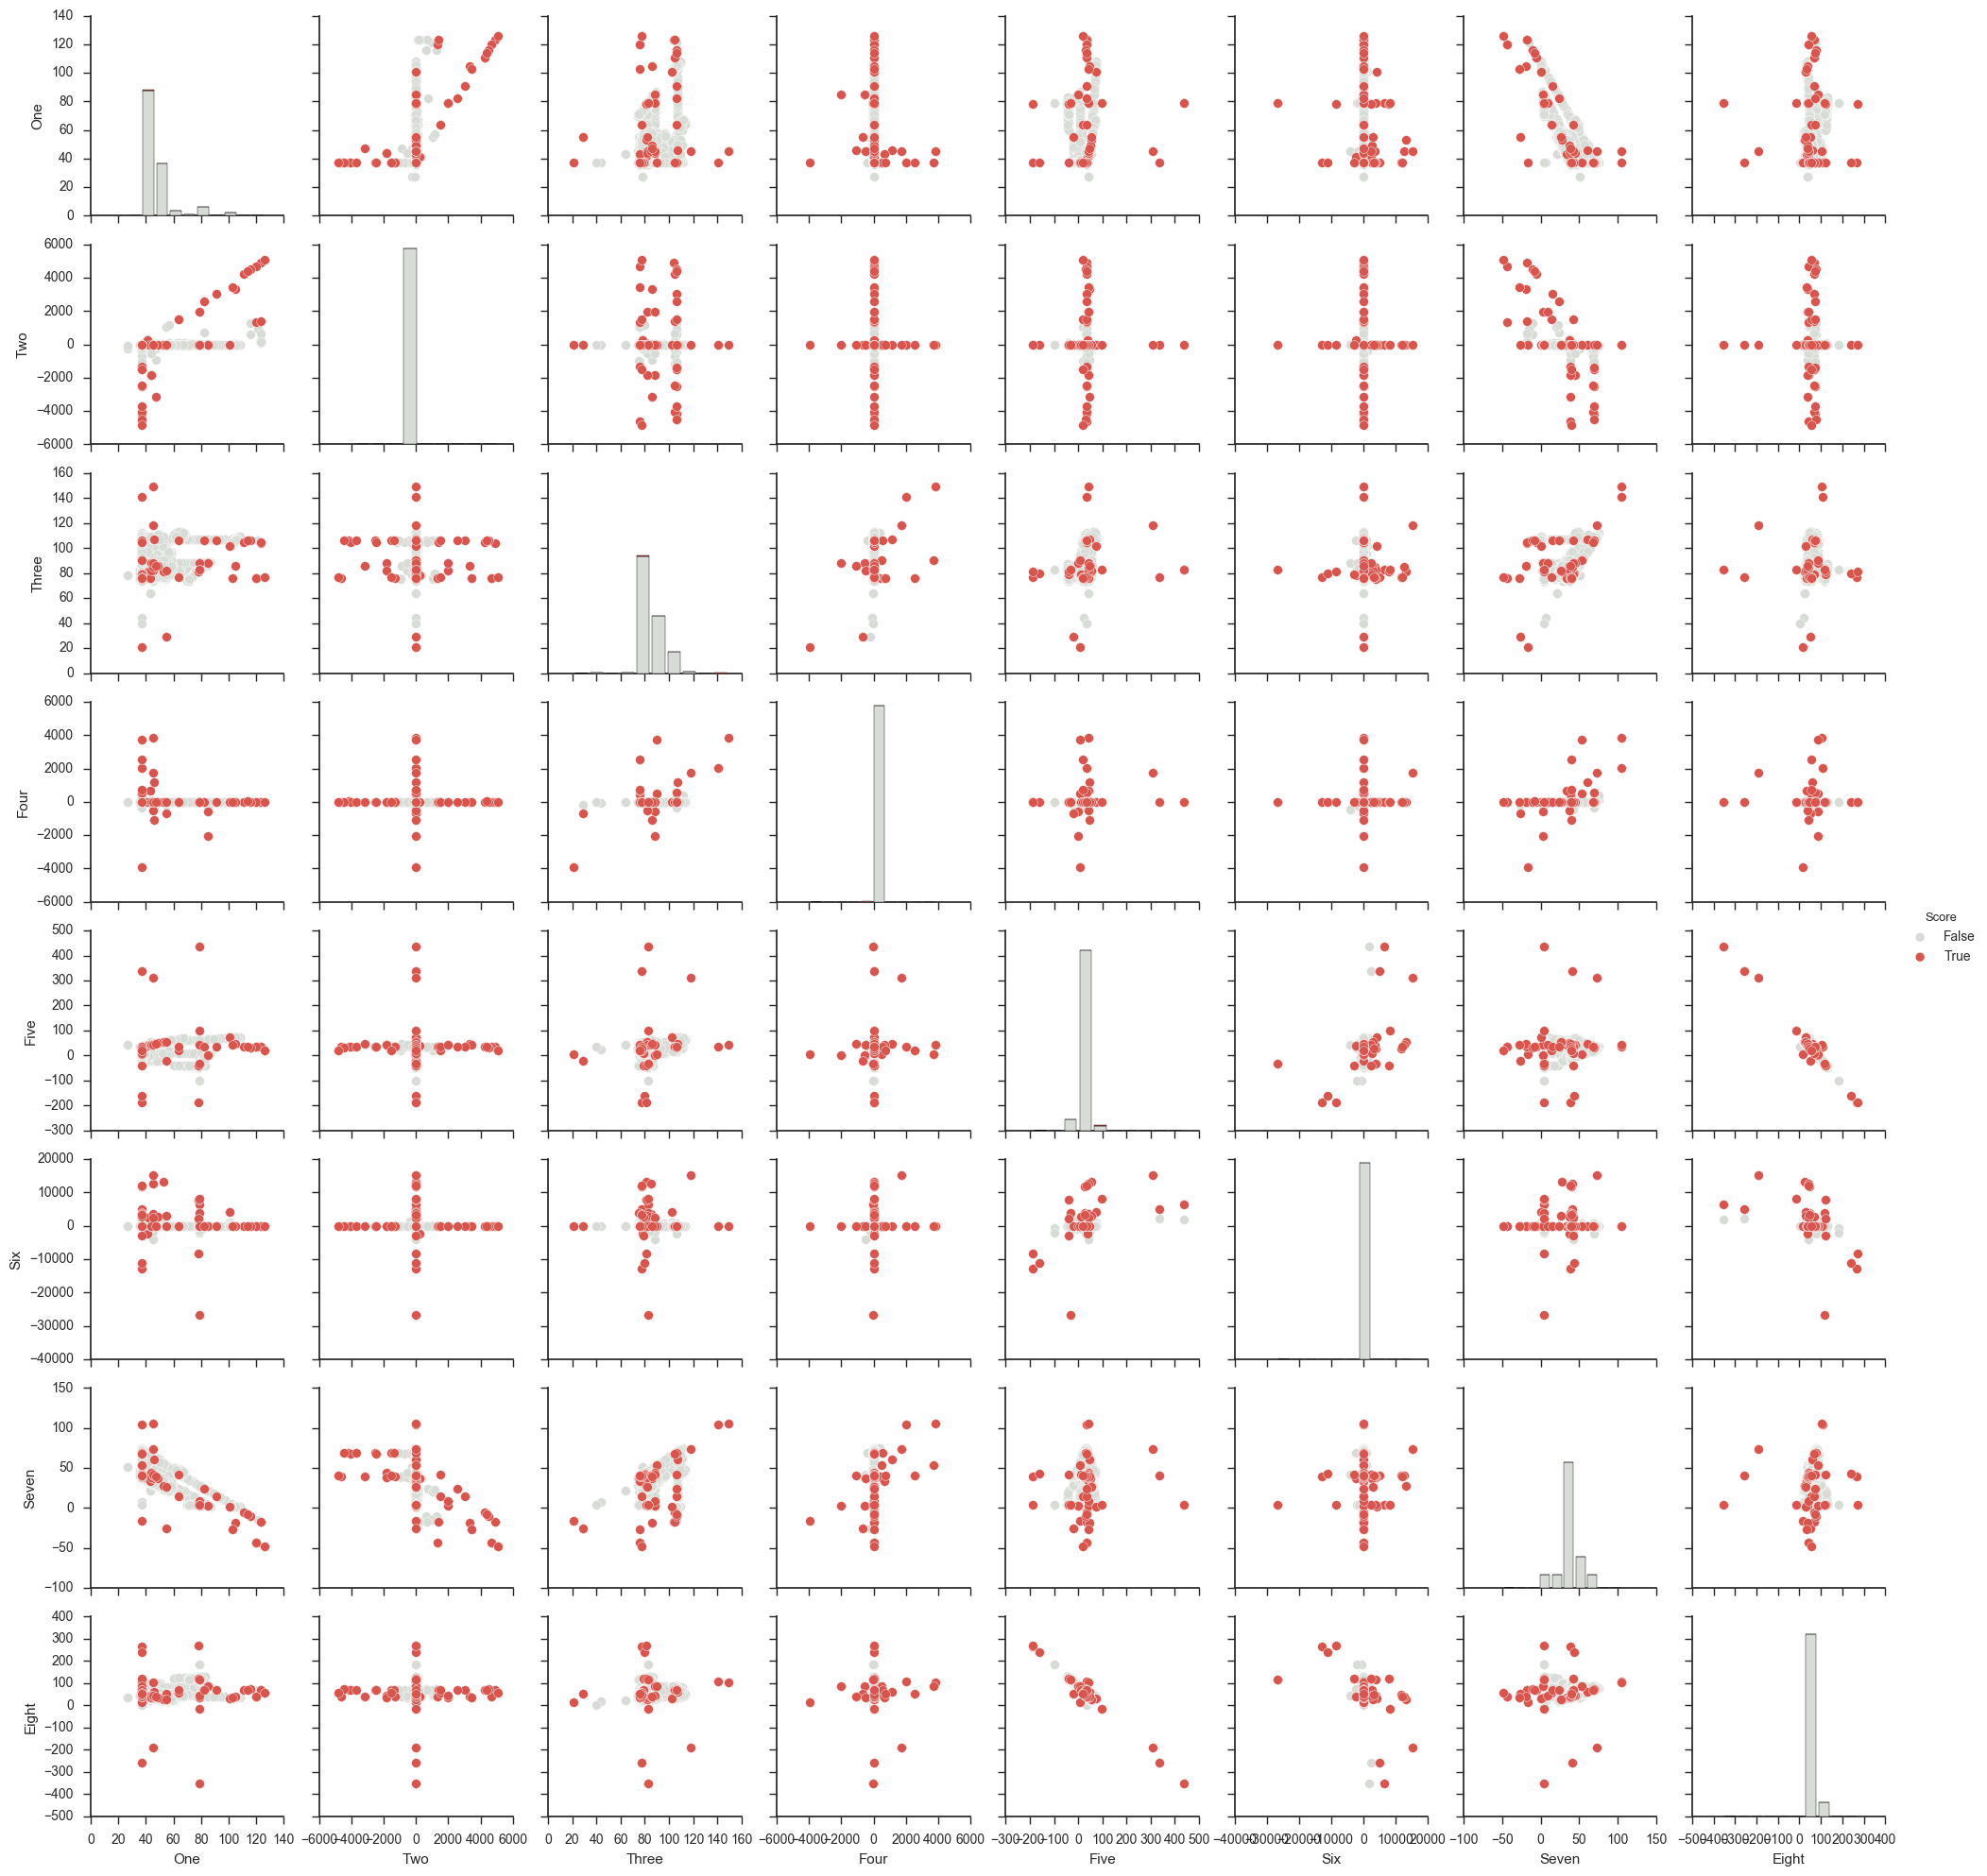

In [21]:
sns.set_palette(sns.xkcd_palette(colorsTwo))
g = sns.pairplot(Xdf, hue="Score", vars=df.columns[0:8], plot_kws={"s": 50})
sns.set_palette(default_palette)

In [22]:
highScore = np.percentile(score_X_std, 99.97)
mediumScore = np.percentile(score_X_std, 99.90)
lowScore = np.percentile(score_X_std, 99.85)

priLabels=[]
for i in score_X_std:
    if (i > highScore):
        priLabels.append('High')
    elif (i > mediumScore):
        priLabels.append('Medium')
    elif (i > lowScore):
        priLabels.append('Low')
    else:
        priLabels.append('Normal')

Xdf['ScoreLabels']=pd.Series(priLabels)

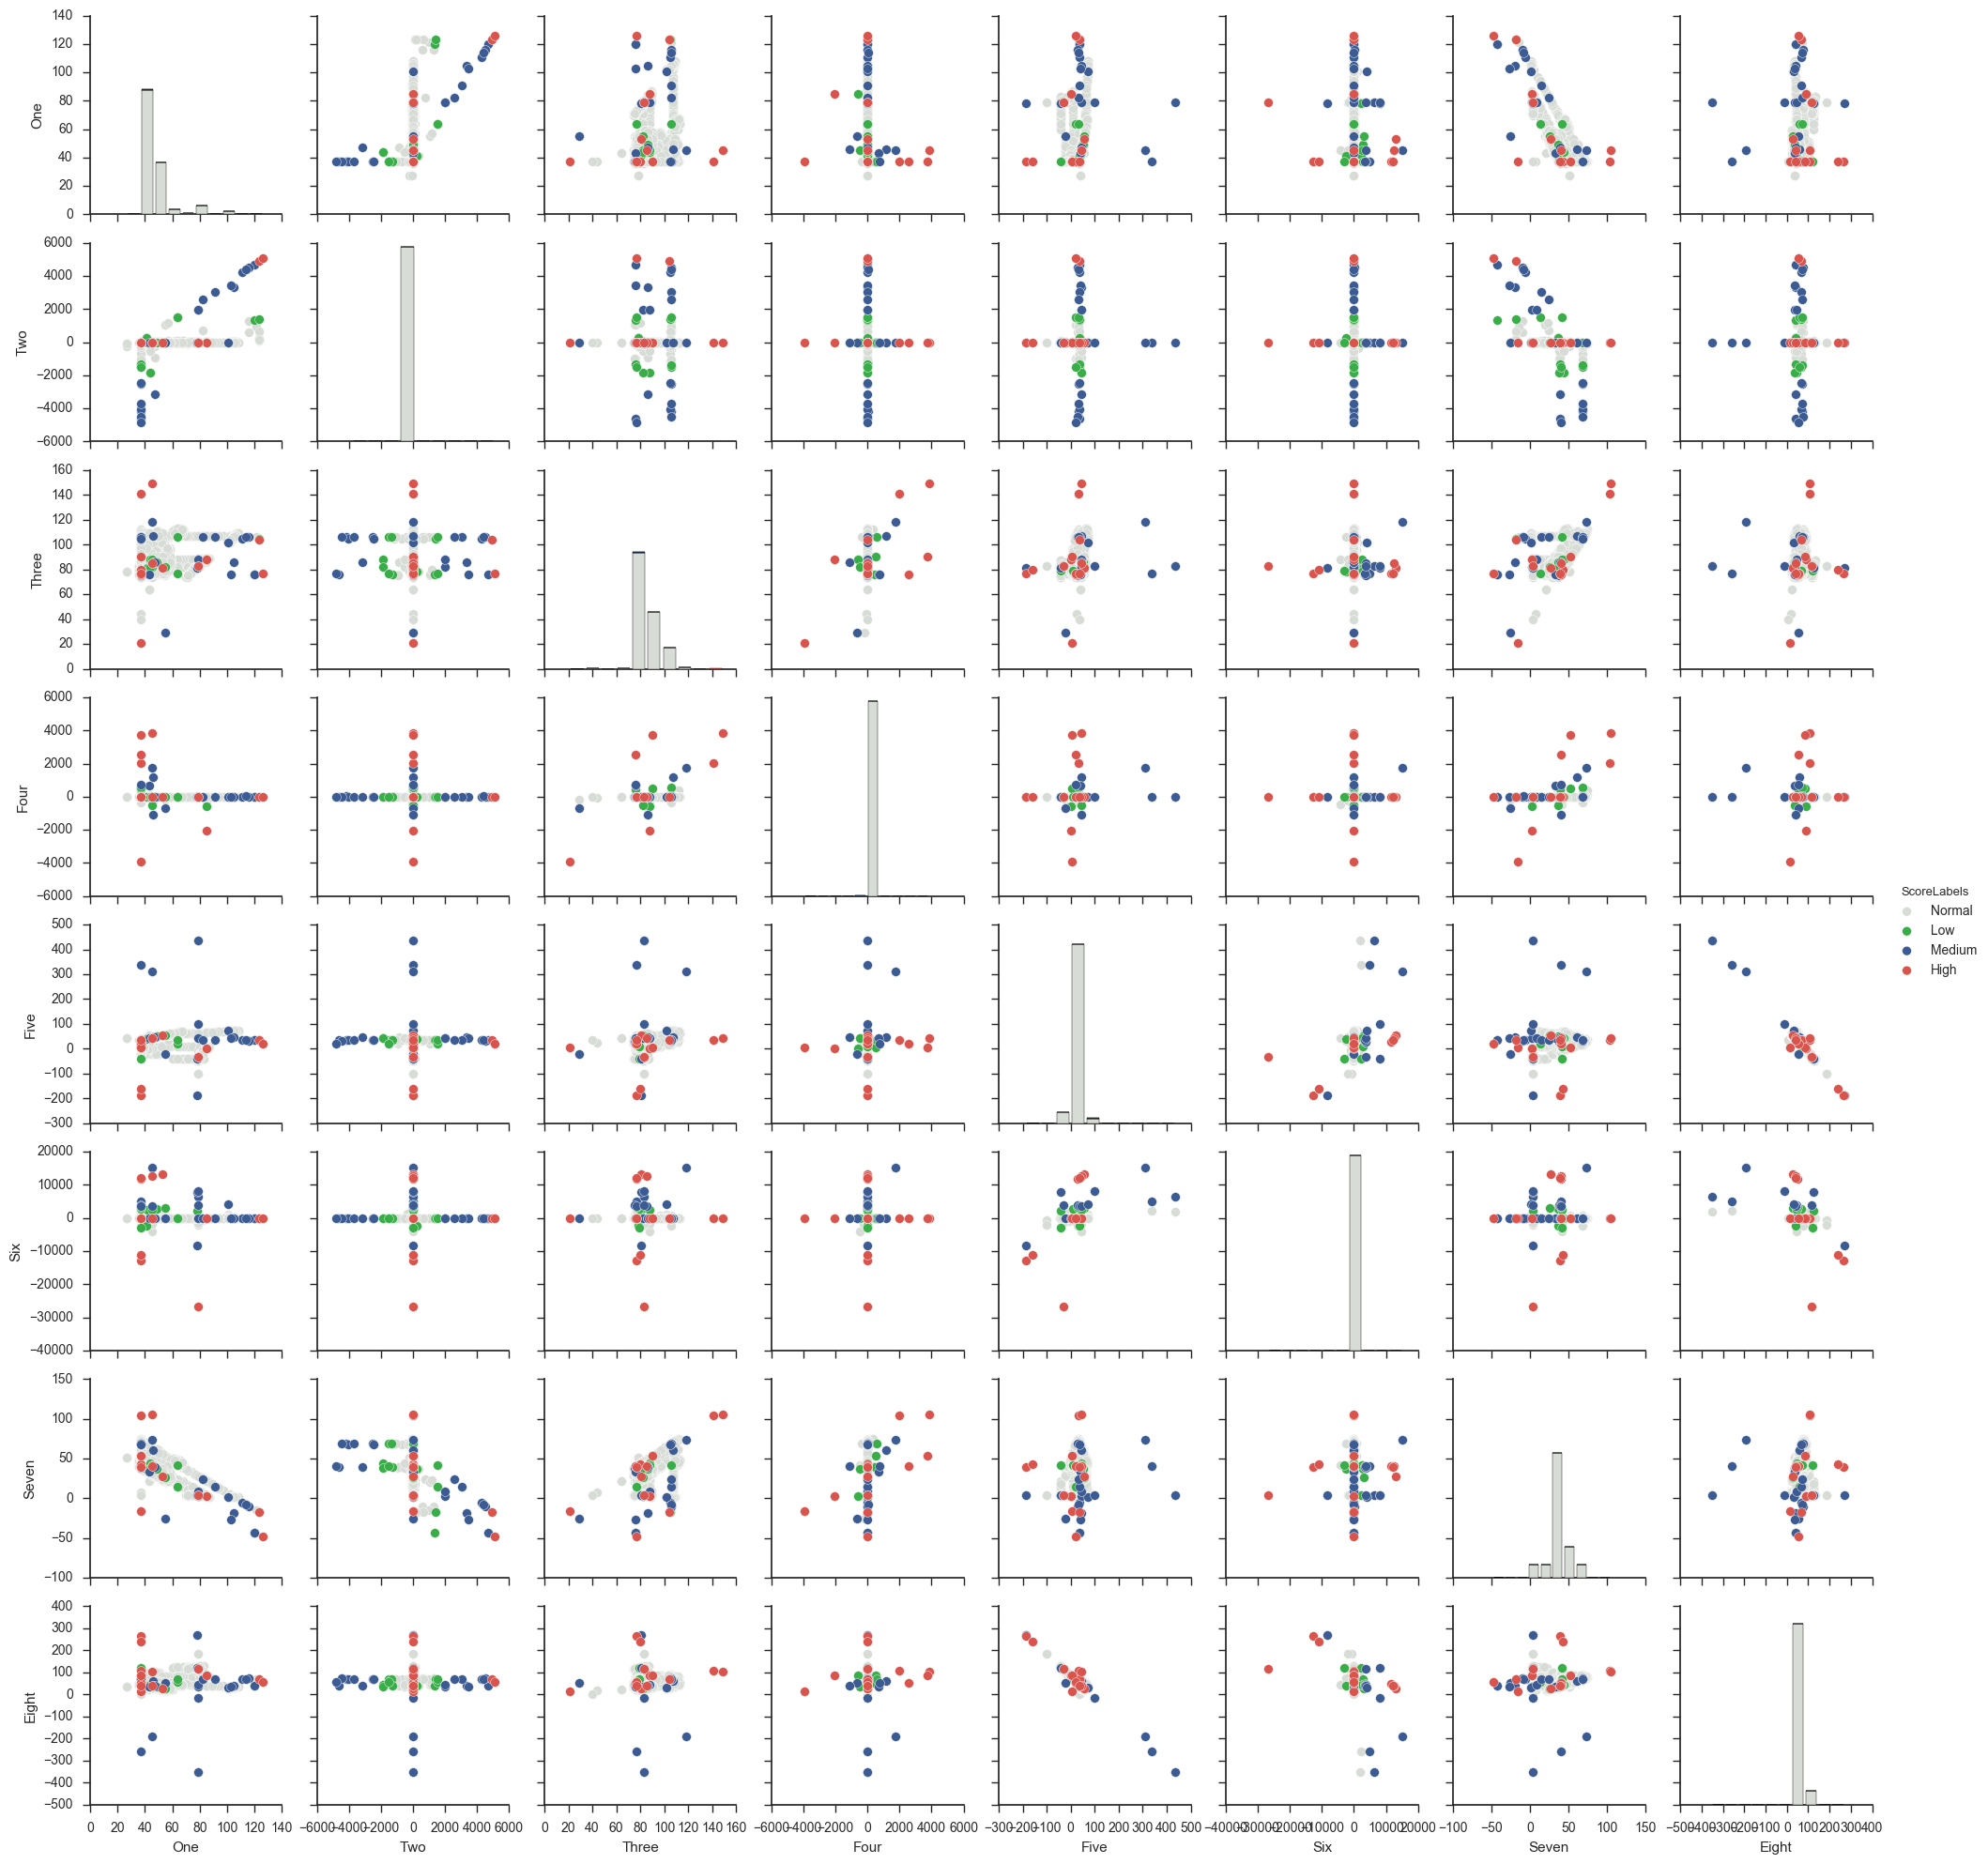

In [23]:
sns.set_palette(sns.xkcd_palette(colorsFour))
g = sns.pairplot(Xdf, hue="ScoreLabels", 
                 hue_order=["Normal", "Low", "Medium", "High"],
                 plot_kws={"s": 50},
                 #markers=["*","D", "s", "o"],        
                 vars=df.columns[0:8])
sns.set_palette(default_palette)

In [24]:
Outliers = Xdf[score_X_std>np.percentile(score_X_std, 99.85)]
# Outliers

In [25]:
Y_Pred=score_X_std>(np.percentile(score_X_std, 99.85))
Y_Pred.astype('int')
accuracy_score(Y, Y_Pred.astype('int'))

0.92844776666598772

In [26]:
Outliers.to_csv('data/OutlierShuttle.csv')

## References

Mei-ling Shyu, et. al. A novel anomaly detection scheme based
on principal component classifier. IEEE Foundations and New Directions of Data Mining Workshop, 2003.

Charu C. Aggarwal. Outlier Analysis. Springer, 2013

### Notes

Point Anomalies, 
unsupervised spectral anomaly detection technique, and scoring

Assumption:
Data can be embedded into a lower dimensional subspace in which
normal instances and anomalies appear significantly different

Challenge: 
        In real applications, huge volume of data and false alarm rate